# Training Model using Count Vectorization

In [60]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud

In [61]:
# Loading data
steam_data = pd.read_csv('Datasets/steam.csv')
descriptions = pd.read_csv('Datasets/steam_description_data.csv')

## Analyzing steam descriptions

In [62]:
descriptions.isnull().sum()

steam_appid             0
detailed_description    0
about_the_game          0
short_description       0
dtype: int64

In [63]:
descriptions.sample(5)

,steam_appid,detailed_description,about_the_game,short_description
27328,1065160,You are an overworked business man who had a l...,You are an overworked business man who had a l...,Deatherem is a first person survival horror ex...
10384,511630,"<img src=""https://gpacgames.com/wp-content/upl...","<img src=""https://gpacgames.com/wp-content/upl...","Max, an Autistic Journey is a retro style top-..."
602,32500,The Star Wars® Saga continues with Star Wars®:...,The Star Wars® Saga continues with Star Wars®:...,The Star Wars® Saga continues with Star Wars®:...
19772,780970,<strong>Important note: This is only a very ch...,<strong>Important note: This is only a very ch...,In order to in those years is sugar decayed to...
14685,636690,"This is the beautiful game, a stunningly playa...","This is the beautiful game, a stunningly playa...","SOCIABLE SOCCER is a brand new, super fast, ac..."


## Merging Data

In [64]:
# merging steam data and description
steam_data = steam_data.merge(
    descriptions, left_on='appid', right_on='steam_appid', how="left")
steam_data = steam_data.drop(["steam_appid", "detailed_description", "about_the_game"], axis=1)
steam_data.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,short_description
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,Play the world's number 1 online action game. ...
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,One of the most popular online action games of...
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,Enlist in an intense brand of Axis vs. Allied ...
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,Enjoy fast-paced multiplayer gaming with Death...
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,Return to the Black Mesa Research Facility as ...


In [65]:
steam_data["steamspy_tags"] = steam_data["steamspy_tags"].apply(lambda x: x.split(";"))
steam_data["genres"] = steam_data["genres"].apply(lambda x: x.split(";"))
steam_data["categories"] = steam_data["categories"].apply(lambda x: x.split(";"))
steam_data["platforms"] = steam_data["platforms"].apply(lambda x: x.split(";"))

In [66]:
def create_word_soup(x):
    return ' '.join(x['steamspy_tags']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['categories']) + ' ' + ' '.join(x['steamspy_tags'])

steam_data['soup'] = steam_data.apply(create_word_soup, axis=1)
# steam_data['soup'].head()

In [67]:
def create_word_soup2(x):
    return ' '.join(x['steamspy_tags']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['categories']) + ' ' + ' '.join(x['steamspy_tags']) + x['short_description']

steam_data['soup2'] = steam_data.apply(create_word_soup2, axis=1)
# steam_data['soup2'].head()

In [68]:
def create_word_soup3(x):
    return ' '.join(x['steamspy_tags']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['categories'])

steam_data['soup3'] = steam_data.apply(create_word_soup3, axis=1)

### Observing the word soup results

In [69]:
# Generate a word cloud image
def create_cloud(soup):
    text = " ".join(soup for soup in soup)
    print("num of words in cloud = ", len(text))
    wordcloud = WordCloud(background_color="white").generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

num of words in cloud =  3428040


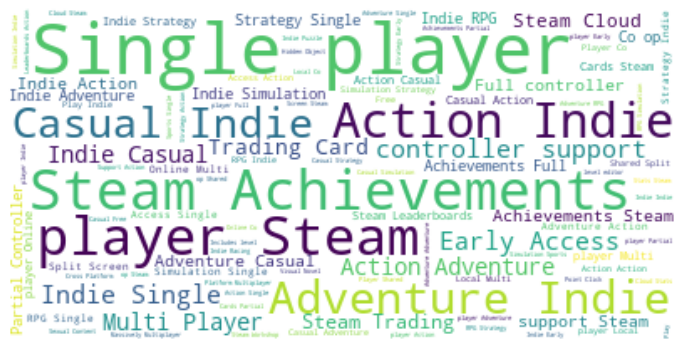

In [70]:
create_cloud(steam_data['soup'])

num of words in cloud =  8924353


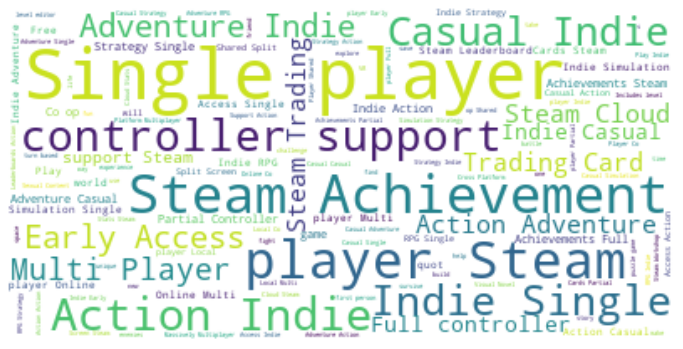

In [71]:
create_cloud(steam_data['soup2'])

num of words in cloud =  2776788


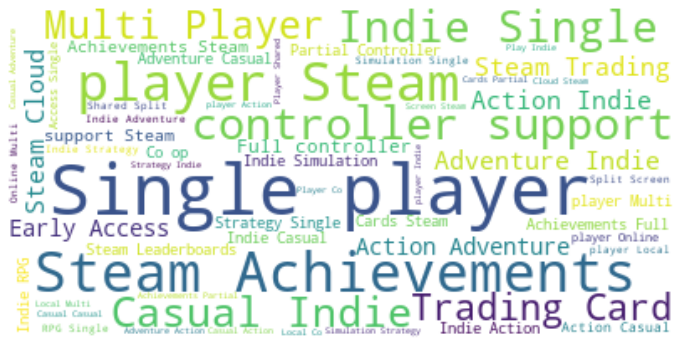

In [72]:
create_cloud(steam_data['soup3'])

num of words in cloud =  5523387


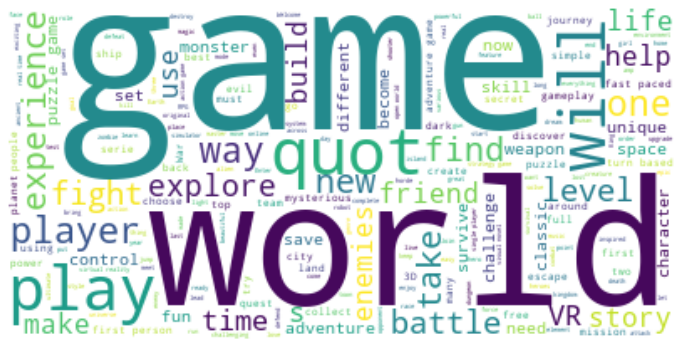

In [73]:
create_cloud(steam_data['short_description'])

From those word clouds, we can see that some common words in the data are singleplayer and achievements, and for the descriptions, game and world are very common words, which should be expected in this case

### Calculating similarity matrixes

In [74]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(steam_data['soup'])

In [75]:
count2 = CountVectorizer(stop_words='english')
count_matrix2 = count.fit_transform(steam_data['soup2'])

In [76]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [77]:
cosine_sim2 = cosine_similarity(count_matrix2, count_matrix2)

In [78]:
indices = pd.Series(steam_data.index, index=steam_data['name']).drop_duplicates()
# Function that takes in game title as input and outputs most similar games
def get_recommendations(name, cosine_sim):
    # Get the index of the game that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all games with that game
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar games
    sim_scores = sim_scores[1:11]
    print(sim_scores)

    # Get the game indices
    game_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar games
    return steam_data['name'].iloc[game_indices]

In [79]:
get_recommendations('Pummel Party', cosine_sim)

[(2790, 0.8923543557893898), (10173, 0.8777074514725111), (15945, 0.8713548411865621), (16712, 0.8682692973566163), (9522, 0.8620450644378708), (14947, 0.8581278705797843), (8176, 0.8542821429703303), (13045, 0.8535375789847595), (2213, 0.8505172717997148), (11062, 0.8505172717997148)]


2790                Gang Beasts
10173               Party Panic
15945     Stick Fight: The Game
16712                Treadnauts
9522                 Antisphere
14947    Blast Zone! Tournament
8176               Nova Nukers!
13045            A Gummy's Life
2213                 Trench Run
11062                bob's game
Name: name, dtype: object

In [80]:
get_recommendations('Gang Beasts', cosine_sim)

[(15945, 0.9526510164590817), (23044, 0.8923543557893898), (13045, 0.8452797012702454), (12830, 0.8410098180364367), (2273, 0.8210359504049012), (13987, 0.7940608497831195), (6360, 0.7907736701585485), (7968, 0.7842934903910448), (11257, 0.781555172954599), (11920, 0.781418064808807)]


15945    Stick Fight: The Game
23044             Pummel Party
13045           A Gummy's Life
12830          Killer Instinct
2273                  Brawlout
13987            Fight of Gods
6360                  TEKKEN 7
7968             Tricky Towers
11257                Nidhogg 2
11920                  iFactor
Name: name, dtype: object

In [81]:
get_recommendations('The Jackbox Party Pack 3', cosine_sim)

[(6637, 0.9379580992210835), (13880, 0.921274161965211), (19438, 0.9211323729436766), (4145, 0.9135215856578669), (8082, 0.8822499905394766), (5733, 0.8350361390594742), (6267, 0.8288677412448127), (7968, 0.8257228238447702), (22532, 0.8115799976738934), (4929, 0.8114441191120669)]


6637     The Jackbox Party Pack 2
13880    The Jackbox Party Pack 4
19438    The Jackbox Party Pack 5
4145       The Jackbox Party Pack
8082                    Drawful 2
5733                     Collider
6267       Ultimate Chicken Horse
7968                Tricky Towers
22532                Octo Gravity
4929                     Quiplash
Name: name, dtype: object

In [82]:
get_recommendations('The Jackbox Party Pack 3', cosine_sim2)

[(6637, 0.7402261699026156), (13880, 0.7019641181630338), (4145, 0.6903101044658569), (19438, 0.6774585199504609), (5733, 0.6702249023263117), (4929, 0.6677611507863381), (8082, 0.6444372938919803), (6267, 0.6420578831241024), (3910, 0.6378471563450057), (8313, 0.6178846610861454)]


6637     The Jackbox Party Pack 2
13880    The Jackbox Party Pack 4
4145       The Jackbox Party Pack
19438    The Jackbox Party Pack 5
5733                     Collider
4929                     Quiplash
8082                    Drawful 2
6267       Ultimate Chicken Horse
3910                  Move or Die
8313                   Overcooked
Name: name, dtype: object

In [83]:
get_recommendations('Stick Fight: The Game', cosine_sim)

[(2790, 0.9526510164590817), (23044, 0.8713548411865621), (13045, 0.8200902402027264), (13935, 0.8139142743514403), (11257, 0.8003905296791063), (20979, 0.8002216987710566), (12830, 0.7997581636151854), (2273, 0.7859865188952451), (2213, 0.7808688094430304), (11062, 0.7808688094430304)]


2790         Gang Beasts
23044       Pummel Party
13045     A Gummy's Life
13935      Galactic Feud
11257          Nidhogg 2
20979         Indie Pogo
12830    Killer Instinct
2273            Brawlout
2213          Trench Run
11062         bob's game
Name: name, dtype: object

In [84]:
get_recommendations('Stick Fight: The Game', cosine_sim2)

[(2790, 0.7064384832625399), (2273, 0.6841280502097695), (23044, 0.6730032754681021), (8176, 0.6475491523429101), (25999, 0.635601624934079), (16632, 0.6312924116892464), (16468, 0.6287722828196262), (14845, 0.6270696725795355), (2213, 0.6251131014931268), (17988, 0.6218743352054218)]


2790          Gang Beasts
2273             Brawlout
23044        Pummel Party
8176         Nova Nukers!
25999       Hyper Scuffle
16632               Bomsy
16468      TETRUX: Online
14845           Mind Maze
2213           Trench Run
17988    OneScreen Wagons
Name: name, dtype: object

In [85]:
get_recommendations('DARK SOULS™: REMASTERED', cosine_sim)

[(5817, 0.8128970193249392), (1728, 0.7816317493509031), (4269, 0.7816317493509031), (3494, 0.7405316311773545), (7792, 0.7121283463642097), (11020, 0.7096774193548389), (17496, 0.7003892132633235), (22914, 0.6985006985010478), (9409, 0.697389673941405), (16653, 0.697389673941405)]


5817                               DARK SOULS™ III
1728                                DARK SOULS™ II
4269      DARK SOULS™ II: Scholar of the First Sin
3494                     Man in a Maze: Deathmatch
7792                               INFERNO CLIMBER
11020                                       Twixel
17496    Robbie Swifthand and the Orb of Mysteries
22914                                 Gravity Wars
9409                    Radical Spectrum: Volume 1
16653                               カニマン VS メカモンキー
Name: name, dtype: object

In [86]:
get_recommendations('DARK SOULS™: REMASTERED', cosine_sim2)

[(5817, 0.6520559380992673), (1728, 0.4975654595302164), (4269, 0.4963405699433595), (11608, 0.44930322168099346), (15096, 0.44713597446396586), (8658, 0.44708976506826115), (11020, 0.44529362639576414), (26009, 0.4451741005242254), (22689, 0.4441026811597043), (20332, 0.441860465116279)]


5817                              DARK SOULS™ III
1728                               DARK SOULS™ II
4269     DARK SOULS™ II: Scholar of the First Sin
11608                                   Rise High
15096                               Rival Megagun
8658                                  Audio Arena
11020                                      Twixel
26009                         Ninja Power Slasher
22689                                   Jumponaut
20332                                 Drill Arena
Name: name, dtype: object

In [87]:
get_recommendations('Ori and the Blind Forest: Definitive Edition', cosine_sim)

[(1022, 0.858395075278952), (1907, 0.7994108773089584), (16277, 0.7857142857142855), (7853, 0.756534415836003), (2055, 0.747017880833996), (1856, 0.7442790926669612), (1961, 0.7290148043997553), (9084, 0.7127864449672372), (13028, 0.7071067811865475), (7325, 0.7027642214999336)]


1022        Sonic Generations Collection
1907                      Freedom Planet
16277                               GRIS
7853      Octahedron: Transfixed Edition
2055            Shantae: Half-Genie Hero
1856                Electronic Super Joy
1961       Shovel Knight: Treasure Trove
9084                   She Wants Me Dead
13028                        Sonic Mania
7325     Everybody's Gone to the Rapture
Name: name, dtype: object

In [88]:
get_recommendations('Ori and the Blind Forest: Definitive Edition', cosine_sim2)

[(1022, 0.6200000000000001), (1256, 0.6046918007655169), (8532, 0.5982243228301002), (7853, 0.5806832031806504), (6386, 0.5570860145311556), (14453, 0.5530083017624435), (13638, 0.5432197707173825), (1907, 0.5370760693098809), (3859, 0.5366563145999496), (5532, 0.531843156256751)]


1022                 Sonic Generations Collection
1256          Hell Yeah! Wrath of the Dead Rabbit
8532                               Dungeon Escape
7853               Octahedron: Transfixed Edition
6386                               Circa Infinity
14453                             GODS Remastered
13638                   Spark the Electric Jester
1907                               Freedom Planet
3859                                Geometry Dash
5532     Mighty Switch Force! Hyper Drive Edition
Name: name, dtype: object

In [89]:
get_recommendations('Shovel Knight: Treasure Trove', cosine_sim)

[(1164, 0.8773190096473715), (2117, 0.8374357893586237), (5144, 0.8371213775625376), (10111, 0.8229511997978236), (2283, 0.8193365776101956), (7853, 0.8153742483272113), (4159, 0.814173684098662), (1856, 0.8102684458914187), (1907, 0.8102684458914187), (7399, 0.8050764858994133)]


1164                             Owlboy
2117                Hyper Light Drifter
5144                           UBERMOSH
10111                           Celeste
2283                Out There Somewhere
7853     Octahedron: Transfixed Edition
4159                        Axiom Verge
1856               Electronic Super Joy
1907                     Freedom Planet
7399                            OneShot
Name: name, dtype: object

In [90]:
get_recommendations('Shovel Knight: Treasure Trove', cosine_sim2)

[(8532, 0.6643253535510508), (4159, 0.635641726163728), (1164, 0.627181507505318), (2117, 0.6266795614405122), (2844, 0.6212607441973953), (4872, 0.6151571584870339), (10241, 0.6141131705360954), (2283, 0.6096727644937043), (5144, 0.6055300708194984), (10081, 0.597440149249054)]


8532                  Dungeon Escape
4159                     Axiom Verge
1164                          Owlboy
2117             Hyper Light Drifter
2844                  8-Bit Commando
4872     Environmental Station Alpha
10241                   Broken Armor
2283             Out There Somewhere
5144                        UBERMOSH
10081              Mahluk:Dark Demon
Name: name, dtype: object

In [91]:
get_recommendations('Overcooked', cosine_sim)

[(14553, 0.9057207530583754), (17882, 0.8947970182602926), (14184, 0.8874643948402557), (1937, 0.8713951676862342), (14021, 0.8683095742273969), (11731, 0.8621054497285195), (11894, 0.8621054497285195), (9094, 0.8488789863689401), (24116, 0.848781542875952), (12628, 0.8443749514233463)]


14553      DERU - The Art of Cooperation
17882                      Overcooked! 2
14184                      Boss Defiance
1937     FORCED: Slightly Better Edition
14021                    Deadbeat Heroes
11731                     Iron Crypticle
11894                    Theatre of Doom
9094                         Speed Brawl
24116                      Survival Ball
12628              Think of the Children
Name: name, dtype: object

In [92]:
get_recommendations('Overcooked', cosine_sim2)

[(17882, 0.7801526932627854), (14553, 0.7471152076463955), (2001, 0.7408239055248218), (24116, 0.7337890780140998), (1937, 0.7232769354416847), (1072, 0.7185496352100393), (16770, 0.7113997097327195), (6267, 0.7060630805716388), (11731, 0.7053852598580456), (24026, 0.7019833503201401)]


17882                      Overcooked! 2
14553      DERU - The Art of Cooperation
2001     Lovers in a Dangerous Spacetime
24116                      Survival Ball
1937     FORCED: Slightly Better Edition
1072                           ibb & obb
16770                       Jump Gunners
6267              Ultimate Chicken Horse
11731                     Iron Crypticle
24026                           Polygone
Name: name, dtype: object

After looking at both results, they both seem like they give good results after comparing them with recommendations from steam. 

Also, we see that the count vectorizor which took into consideration the description had less similar values, which is expected since the dimensionality is higher. However, we can also see that by adding the description, sequels or prequels of games are almost always at the top (since they will have similar descriptions) and this might not always be desirable. This is because someone who has played a game, for e.g Overcooked, would most likely know about the sequels, so they don't really need to be recommended that game. 

Therefore, it looks like count vectorization without the short description yields better results

# Hybrid Method

In [93]:
data = pd.read_csv('Datasets/data_clustered.csv')

In [94]:
data.head()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted,genres_cluster,genres_cluster_unweighted,hac
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,Counter-Strike,12353.0,0.937181,0.968591,0.941109,3,3,15,14,10
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,Team Fortress Classic,1542.0,0.678340,0.839170,0.801963,0,0,15,14,8
2,30,Day of Defeat,187,5000000-10000000,89.564761,1,0,0,0,0,...,Day of Defeat,1030.0,0.819417,0.909709,0.858964,0,0,15,14,8
3,40,Deathmatch Classic,258,5000000-10000000,82.662338,1,0,0,0,0,...,Deathmatch Classic,457.0,0.702407,0.851204,0.795670,0,0,15,14,8
4,50,Half-Life: Opposing Force,624,5000000-10000000,94.799567,1,0,0,0,0,...,Half-Life: Opposing Force,1743.0,0.925416,0.962708,0.913786,0,0,15,14,7


In [95]:
cols = ['appid','kmeans_cluster', 'genres_cluster', 'kmeans_cluster_unweighted', 'genres_cluster_unweighted', 'hac', 'weighted_score']
cluster_data = data[cols]
cluster_data.sample(4)

,appid,kmeans_cluster,genres_cluster,kmeans_cluster_unweighted,genres_cluster_unweighted,hac,weighted_score
16634,697580,0,0,0,0,12,0.000000
3703,316970,0,9,0,11,12,0.526821
16777,701810,0,6,0,6,12,0.000000
13003,585830,0,16,0,1,8,0.000000


In [96]:
data = steam_data.merge(cluster_data, left_on="appid", right_on="appid", how="left")
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,short_description,soup,soup2,soup3,kmeans_cluster,genres_cluster,kmeans_cluster_unweighted,genres_cluster_unweighted,hac,weighted_score
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",[Action],...,Play the world's number 1 online action game. ...,Action FPS Multiplayer Action Multi-player Onl...,Action FPS Multiplayer Action Multi-player Onl...,Action FPS Multiplayer Action Multi-player Onl...,3.0,15.0,3.0,14.0,10.0,0.941109
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",[Action],...,One of the most popular online action games of...,Action FPS Multiplayer Action Multi-player Onl...,Action FPS Multiplayer Action Multi-player Onl...,Action FPS Multiplayer Action Multi-player Onl...,0.0,15.0,0.0,14.0,8.0,0.801963
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled]",[Action],...,Enlist in an intense brand of Axis vs. Allied ...,FPS World War II Multiplayer Action Multi-play...,FPS World War II Multiplayer Action Multi-play...,FPS World War II Multiplayer Action Multi-play...,0.0,15.0,0.0,14.0,8.0,0.858964
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",[Action],...,Enjoy fast-paced multiplayer gaming with Death...,Action FPS Multiplayer Action Multi-player Onl...,Action FPS Multiplayer Action Multi-player Onl...,Action FPS Multiplayer Action Multi-player Onl...,0.0,15.0,0.0,14.0,8.0,0.795670
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,"[windows, mac, linux]",0,"[Single-player, Multi-player, Valve Anti-Cheat...",[Action],...,Return to the Black Mesa Research Facility as ...,FPS Action Sci-fi Action Single-player Multi-p...,FPS Action Sci-fi Action Single-player Multi-p...,FPS Action Sci-fi Action Single-player Multi-p...,0.0,15.0,0.0,14.0,7.0,0.913786


In [97]:
data.isnull().sum()

appid                          0
name                           0
release_date                   0
english                        0
developer                      0
publisher                      0
platforms                      0
required_age                   0
categories                     0
genres                         0
steamspy_tags                  0
achievements                   0
positive_ratings               0
negative_ratings               0
average_playtime               0
median_playtime                0
owners                         0
price                          0
short_description              0
soup                           0
soup2                          0
soup3                          0
kmeans_cluster               511
genres_cluster               511
kmeans_cluster_unweighted    511
genres_cluster_unweighted    511
hac                          511
weighted_score               511
dtype: int64

In [98]:
data = data.fillna(0)
data.isnull().sum()

appid                        0
name                         0
release_date                 0
english                      0
developer                    0
publisher                    0
platforms                    0
required_age                 0
categories                   0
genres                       0
steamspy_tags                0
achievements                 0
positive_ratings             0
negative_ratings             0
average_playtime             0
median_playtime              0
owners                       0
price                        0
short_description            0
soup                         0
soup2                        0
soup3                        0
kmeans_cluster               0
genres_cluster               0
kmeans_cluster_unweighted    0
genres_cluster_unweighted    0
hac                          0
weighted_score               0
dtype: int64

In [99]:
indices = pd.Series(data.index, index=data['name']).drop_duplicates()
# Function that takes in game title as input and outputs most similar games
def get_recommendations_hybrid(name, cosine_sim):
    idx = indices[name]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 100 most similar games
    sim_scores = sim_scores[1:101]

    game_indices = [i[0] for i in sim_scores]
    
    # Adding the weighted score bias
    games = data.loc[game_indices]
    
    # Calculating hybrid rating
    games['weighted_score'] = games['weighted_score'] + 1
    games['sim_scores'] = np.array([i[1] for i in sim_scores]) + 1
    games['hybrid_rating'] = games['weighted_score'].mul(np.power(games['sim_scores'], 2)) 
    games = games[['appid', 'name', 'weighted_score', 'hybrid_rating', 'sim_scores']]
    
    # Return the top 10 most similar games
    return games[:10].sort_values('hybrid_rating', ascending=False)

In [100]:
get_recommendations_hybrid('Overcooked', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
14553,632250,DERU - The Art of Cooperation,1.0,3.631772,1.905721
17882,728880,Overcooked! 2,1.0,3.590256,1.894797
14184,619470,Boss Defiance,1.0,3.562522,1.887464
1937,249990,FORCED: Slightly Better Edition,1.0,3.502120,1.871395
14021,614090,Deadbeat Heroes,1.0,3.490581,1.868310
11731,548680,Iron Crypticle,1.0,3.467437,1.862105
11894,553020,Theatre of Doom,1.0,3.467437,1.862105
9094,468670,Speed Brawl,1.0,3.418354,1.848879
24116,918690,Survival Ball,1.0,3.417993,1.848782
12628,573600,Think of the Children,1.0,3.401719,1.844375


In [101]:
get_recommendations_hybrid('Gang Beasts', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
7968,437920,Tricky Towers,1.731891,5.513826,1.784293
15945,674940,Stick Fight: The Game,1.000000,3.812846,1.952651
23044,880940,Pummel Party,1.000000,3.581005,1.892354
13045,585190,A Gummy's Life,1.000000,3.405057,1.845280
12830,577940,Killer Instinct,1.000000,3.389317,1.841010
2273,263720,Brawlout,1.000000,3.316172,1.821036
13987,612930,Fight of Gods,1.000000,3.218654,1.794061
6360,389730,TEKKEN 7,1.000000,3.206870,1.790774
11257,535520,Nidhogg 2,1.000000,3.173939,1.781555
11920,553570,iFactor,1.000000,3.173450,1.781418


In [102]:
get_recommendations_hybrid('Brawlhalla', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
1722,236110,Dungeon Defenders II,1.724005,5.776038,1.830399
4400,338810,Demise of Nations,1.704356,5.752936,1.837234
4298,336040,Combat Monsters,1.708333,5.678557,1.823193
10377,511800,ONRAID,1.708443,5.672777,1.822206
1576,225840,Sven Co-op,1.000000,3.484563,1.866698
11104,530700,Argo,1.000000,3.409152,1.846389
6661,397900,Business Tour - Board Game with Online Multipl...,1.000000,3.398584,1.843525
13171,587860,Tales of Escape,1.000000,3.350360,1.830399
24173,921590,DISSIDIA FINAL FANTASY NT Free Edition,1.000000,3.348876,1.829993
2273,263720,Brawlout,1.000000,3.336445,1.826594


In [103]:
get_recommendations_hybrid('Counter-Strike', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
1,20,Team Fortress Classic,1.801963,7.207852,2.000000
3,40,Deathmatch Classic,1.795670,7.182678,2.000000
5,60,Ricochet,1.800802,6.984846,1.969452
7,80,Counter-Strike: Condition Zero,1.855981,6.711872,1.901670
6,70,Half-Life,1.935006,6.523032,1.836046
520,24960,Battlefield: Bad Company™ 2,1.856279,6.330310,1.846676
13,320,Half-Life 2: Deathmatch,1.851906,6.181269,1.826961
15,360,Half-Life Deathmatch: Source,1.698047,5.996734,1.879241
203,7940,Call of Duty® 4: Modern Warfare®,1.000000,3.410214,1.846676
616,32770,Joint Operations: Combined Arms Gold,1.000000,3.344691,1.828850


In [104]:
get_recommendations('Counter-Strike', cosine_sim)

[(1, 1.0), (3, 1.0), (5, 0.9694521124707417), (7, 0.9016696346674323), (15, 0.8792409721848787), (203, 0.8466764917335872), (520, 0.8466764917335872), (6, 0.8360460766979309), (616, 0.8288497269823398), (13, 0.82696125397278)]


1                     Team Fortress Classic
3                        Deathmatch Classic
5                                  Ricochet
7            Counter-Strike: Condition Zero
15             Half-Life Deathmatch: Source
203        Call of Duty® 4: Modern Warfare®
520             Battlefield: Bad Company™ 2
6                                 Half-Life
616    Joint Operations: Combined Arms Gold
13                  Half-Life 2: Deathmatch
Name: name, dtype: object

In [113]:
indices = pd.Series(data.index, index=data['name']).drop_duplicates()
def get_recommendations_hybrid2(name, cosine_sim):
    idx = indices[name]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:101]

    # Get the game indices
    game_indices = [i[0] for i in sim_scores]
    
    # Adding the weighted score bias
    games = data.loc[game_indices]
    games['weighted_score'] = games['weighted_score'] + 1

    # Trying out another equation for the hybrid rating
    games['sim_scores'] = np.array([i[1] for i in sim_scores]) + 1
    games['hybrid_rating'] = (games['weighted_score'].mul(0.8)).add(games['sim_scores'].mul(0.2))
    games = games[['appid', 'name', 'weighted_score', 'hybrid_rating', 'sim_scores']]
    
    # Return the top 10 most similar games
    return games[:10].sort_values('hybrid_rating', ascending=False)

In [114]:
get_recommendations_hybrid2('Counter-Strike', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
6,70,Half-Life,1.935006,1.915214,1.836046
7,80,Counter-Strike: Condition Zero,1.855981,1.865119,1.901670
520,24960,Battlefield: Bad Company™ 2,1.856279,1.854359,1.846676
13,320,Half-Life 2: Deathmatch,1.851906,1.846917,1.826961
1,20,Team Fortress Classic,1.801963,1.841570,2.000000
3,40,Deathmatch Classic,1.795670,1.836536,2.000000
5,60,Ricochet,1.800802,1.834532,1.969452
15,360,Half-Life Deathmatch: Source,1.698047,1.734286,1.879241
203,7940,Call of Duty® 4: Modern Warfare®,1.000000,1.169335,1.846676
616,32770,Joint Operations: Combined Arms Gold,1.000000,1.165770,1.828850


In [118]:
get_recommendations_hybrid('Counter-Strike', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
1,20,Team Fortress Classic,1.801963,7.207852,2.000000
3,40,Deathmatch Classic,1.795670,7.182678,2.000000
5,60,Ricochet,1.800802,6.984846,1.969452
7,80,Counter-Strike: Condition Zero,1.855981,6.711872,1.901670
6,70,Half-Life,1.935006,6.523032,1.836046
520,24960,Battlefield: Bad Company™ 2,1.856279,6.330310,1.846676
13,320,Half-Life 2: Deathmatch,1.851906,6.181269,1.826961
15,360,Half-Life Deathmatch: Source,1.698047,5.996734,1.879241
203,7940,Call of Duty® 4: Modern Warfare®,1.000000,3.410214,1.846676
616,32770,Joint Operations: Combined Arms Gold,1.000000,3.344691,1.828850


In [111]:
get_recommendations_hybrid2('Brawlhalla', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
1722,236110,Dungeon Defenders II,1.724005,1.745284,1.830399
4298,336040,Combat Monsters,1.708333,1.731305,1.823193
10377,511800,ONRAID,1.708443,1.731196,1.822206
4400,338810,Demise of Nations,1.704356,1.730932,1.837234
1576,225840,Sven Co-op,1.000000,1.173340,1.866698
11104,530700,Argo,1.000000,1.169278,1.846389
6661,397900,Business Tour - Board Game with Online Multipl...,1.000000,1.168705,1.843525
13171,587860,Tales of Escape,1.000000,1.166080,1.830399
24173,921590,DISSIDIA FINAL FANTASY NT Free Edition,1.000000,1.165999,1.829993
2273,263720,Brawlout,1.000000,1.165319,1.826594


In [112]:
get_recommendations_hybrid2('Team Fortress 2', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
2321,265630,Fistful of Frags,1.898308,1.874443,1.778981
1916,248570,Toribash,1.876032,1.856395,1.777844
3189,299360,Block N Load,1.706961,1.728016,1.812237
4383,338180,Batla,1.535274,1.594657,1.832193
4272,335330,Brick-Force,1.295509,1.396292,1.799422
8129,444090,Paladins®,1.000000,1.164533,1.822665
12842,578310,BRAIN / OUT,1.000000,1.161478,1.807391
25,730,Counter-Strike: Global Offensive,1.000000,1.159231,1.796154
4221,333930,Dirty Bomb®,1.000000,1.159082,1.795412
412,17570,"Pirates, Vikings, and Knights II",1.000000,1.157887,1.789437


In [117]:
get_recommendations_hybrid('Team Fortress 2', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
2321,265630,Fistful of Frags,1.898308,6.007715,1.778981
1916,248570,Toribash,1.876032,5.929634,1.777844
3189,299360,Block N Load,1.706961,5.606003,1.812237
4383,338180,Batla,1.535274,5.153806,1.832193
4272,335330,Brick-Force,1.295509,4.194756,1.799422
8129,444090,Paladins®,1.000000,3.322106,1.822665
12842,578310,BRAIN / OUT,1.000000,3.266663,1.807391
25,730,Counter-Strike: Global Offensive,1.000000,3.226169,1.796154
4221,333930,Dirty Bomb®,1.000000,3.223503,1.795412
412,17570,"Pirates, Vikings, and Knights II",1.000000,3.202086,1.789437


In [115]:
get_recommendations_hybrid2('Gang Beasts', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
7968,437920,Tricky Towers,1.731891,1.742371,1.784293
15945,674940,Stick Fight: The Game,1.000000,1.190530,1.952651
23044,880940,Pummel Party,1.000000,1.178471,1.892354
13045,585190,A Gummy's Life,1.000000,1.169056,1.845280
12830,577940,Killer Instinct,1.000000,1.168202,1.841010
2273,263720,Brawlout,1.000000,1.164207,1.821036
13987,612930,Fight of Gods,1.000000,1.158812,1.794061
6360,389730,TEKKEN 7,1.000000,1.158155,1.790774
11257,535520,Nidhogg 2,1.000000,1.156311,1.781555
11920,553570,iFactor,1.000000,1.156284,1.781418


In [116]:
get_recommendations_hybrid('Gang Beasts', cosine_sim)

,appid,name,weighted_score,hybrid_rating,sim_scores
7968,437920,Tricky Towers,1.731891,5.513826,1.784293
15945,674940,Stick Fight: The Game,1.000000,3.812846,1.952651
23044,880940,Pummel Party,1.000000,3.581005,1.892354
13045,585190,A Gummy's Life,1.000000,3.405057,1.845280
12830,577940,Killer Instinct,1.000000,3.389317,1.841010
2273,263720,Brawlout,1.000000,3.316172,1.821036
13987,612930,Fight of Gods,1.000000,3.218654,1.794061
6360,389730,TEKKEN 7,1.000000,3.206870,1.790774
11257,535520,Nidhogg 2,1.000000,3.173939,1.781555
11920,553570,iFactor,1.000000,3.173450,1.781418
